In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Q1

In [2]:
# Q1-2

X = np.array([[0,3,0],[2,0,0],[0,1,3],[0,1,2],[-1,0,1],[1,1,1]])
y = np.array([0,0,0,1,1,0])# red 0, green 1
test = np.array([0,0,0])
dist = np.linalg.norm(X-test, ord=2, axis=1)
np.set_printoptions(3)
print(dist)

[3.    2.    3.162 2.236 1.414 1.732]


fpr: [0.   0.25 0.25 0.5  0.5  0.75 0.75 1.  ] 
tpr: [0.    0.    0.333 0.333 0.667 0.667 1.    1.   ] 
th: [2.   1.   0.85 0.8  0.55 0.45 0.3  0.2 ]


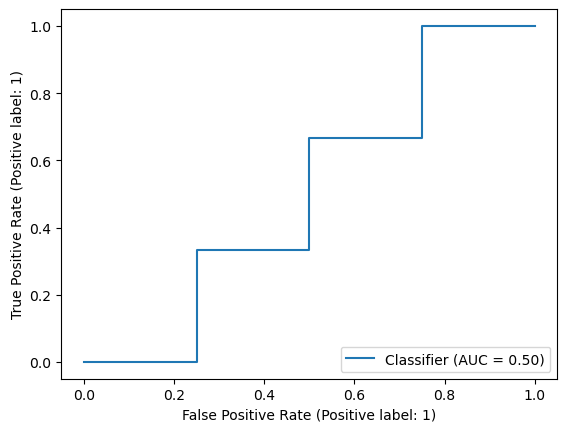

In [3]:
# Q1-5

from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

y = np.array([1,1,0,1,1,0,1,1,0,0])
score = np.array([.95,.85, .8,.7,.55,.45,.4,.3,.2,1])
fpr, tpr, thresholds = metrics.roc_curve(y, score, pos_label=1)

print('fpr:',fpr,'\ntpr:',tpr, '\nth:',thresholds)
RocCurveDisplay.from_predictions(y_true=y, y_pred=score, pos_label=1)

# Q2


In [4]:
def knn_predict(train_set, train_label, test_set, k):
    # test size x train size matrix, each row rep test dist to all train
    dist = np.array([np.linalg.norm(train_set - test, ord=2, axis=1) for test in test_set])
    # test size x train size matrix, sorted distance up to k within in row
    idx_matrix = np.argpartition(dist, k)
    # get label of top k neighbor
    y_pred_list =  train_label[idx_matrix[:,:k]].astype(np.int64)
    # majority voting, input must be int
    y_pred = np.array([np.bincount(l).argmax() for l in y_pred_list])
    return y_pred

In [6]:
# load train Q2-1
data = np.genfromtxt('hw3Data/D2z.txt')
x = data[:,:2]
y = data[:,-1]

In [7]:
# creat grid test
min1, max1 = -2,2
#interval of 0.1, 40 lines of grid per side
x1grid = np.arange(min1, max1, 0.1) 
xx, yy = np.meshgrid(x1grid, x1grid)
# 40 x 4    0 sampling points over domain
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = np.array(knn_predict(x, y, grid,1))
zz = yhat.reshape(xx.shape)

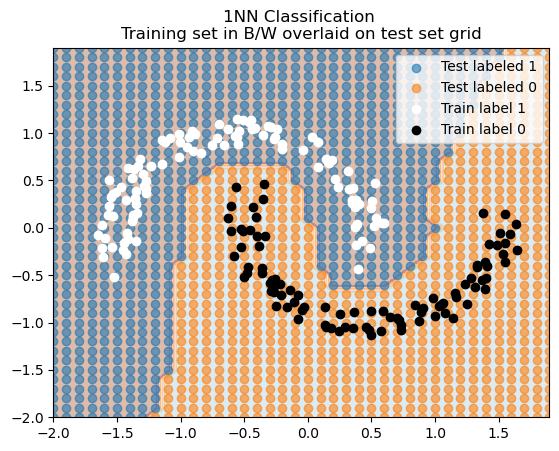

In [8]:
# plots
plt.contourf(xx, yy, zz, cmap='Paired', alpha=0.4)
plt.scatter(grid[:, 0][yhat==1], grid[:, 1][yhat==1], alpha=0.6, label='Test labeled 1')
plt.scatter(grid[:, 0][yhat==0], grid[:, 1][yhat==0], alpha=0.6, label='Test labeled 0')
plt.scatter(x[:,0][y==1],x[:,1][y==1], c='white', label='Train label 1 ')
plt.scatter(x[:,0][y==0],x[:,1][y==0], c='black', label='Train label 0 ')
plt.legend()
plt.title('1NN Classification \nTraining set in B/W overlaid on test set grid')
plt.show()

In [11]:
# Q2-2

df = pd.read_csv('hw3Data/emails.csv')
df = df.set_index('Email No.')
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
Email No.,,,,,,,,,,,,,,,,,,,,,
Email 1,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Email 2,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
Email 3,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
Email 4,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
Email 5,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [228]:
# 1NN Classification 5 fold cross validation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

for i in range(5):
    # test range: [0:1000), [1000,2000)...
    test_df = df.iloc[i*1000:(i+1)*1000]
    # train set by exluding test set 
    train_df = df[~df.index.isin(test_df.index.values)]

    x_train = train_df.drop(columns='Prediction').to_numpy()
    y_train = train_df['Prediction'].to_numpy()
    x_test = test_df.drop(columns='Prediction').to_numpy()
    y_test = test_df['Prediction'].to_numpy()

    y_hat = np.array(list(knn_predict(x_train,y_train, x_test, 1)))
    acc = accuracy_score(y_test, y_hat)
    pre = precision_score(y_test, y_hat)
    rec = recall_score(y_test, y_hat)
    print(f'Fold {i+1},  Accuracy:{acc:.4f}; Precision:{pre:.4f}; Recall:{rec:.4f}')


Fold 1:   Accuracy:0.8250; Precision:0.6545; Recall:0.8175
Fold 2:   Accuracy:0.8530; Precision:0.6857; Recall:0.8664
Fold 3:   Accuracy:0.8620; Precision:0.7212; Recall:0.8380
Fold 4:   Accuracy:0.8510; Precision:0.7164; Recall:0.8163
Fold 5:   Accuracy:0.7750; Precision:0.6057; Recall:0.7582


In [17]:
# Q2-3 Logistic Classification Grad 5 fold cross validation 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import warnings

from LogisticRegressionGrad import LogisticRegression

warnings.filterwarnings("ignore")
for i in range(5):
    # test range: [0:1000), [1000,2000)...
    test_df = df.iloc[i*1000:(i+1)*1000]
    # train set by exluding test set 
    train_df = df[~df.index.isin(test_df.index.values)]

    x_train = train_df.drop(columns='Prediction').to_numpy()
    y_train = train_df['Prediction'].to_numpy()
    x_test = test_df.drop(columns='Prediction').to_numpy()
    y_test = test_df['Prediction'].to_numpy()

    clf = LogisticRegression()
    clf.fit(x_train,y_train,alpha=0.001,iter=1000)
    y_hat = np.array(clf.predict(x_test))
    acc = accuracy_score(y_test, y_hat)
    pre = precision_score(y_test, y_hat)
    rec = recall_score(y_test, y_hat)
    print(f'Fold {i+1},  Accuracy:{acc:.4f}; Precision:{pre:.4f}; Recall:{rec:.4f}')
    


Fold 1:   Accuracy:0.9070; Precision:0.8692; Recall:0.7930
Fold 2:   Accuracy:0.8950; Precision:0.8308; Recall:0.7798
Fold 3:   Accuracy:0.8250; Precision:0.9160; Recall:0.4225
Fold 4:   Accuracy:0.8790; Precision:0.7450; Recall:0.8946
Fold 5:   Accuracy:0.8480; Precision:0.8130; Recall:0.6536


In [12]:
# Q2-4 k= (1, 3, 5, 7, 10)

# (1, 3, 5, 7, 10) KNN Classification 5 fold cross validation
from sklearn.metrics import accuracy_score

k_list = [1, 3, 5, 7, 10]
accuracy_list = [0]*len(k_list)
for j, k in enumerate(k_list):
    for i in range(5):
        # test range: [0:1000), [1000,2000)...
        test_df = df.iloc[i*1000:(i+1)*1000]
        # train set by exluding test set 
        train_df = df[~df.index.isin(test_df.index.values)]

        x_train = train_df.drop(columns='Prediction').to_numpy()
        y_train = train_df['Prediction'].to_numpy()
        x_test = test_df.drop(columns='Prediction').to_numpy()
        y_test = test_df['Prediction'].to_numpy()

        y_hat = np.array(list(knn_predict(x_train,y_train, x_test, k)))
        accuracy_list[j] += accuracy_score(y_test, y_hat)

In [14]:
np.divide(accuracy_list,5)

array([0.833, 0.842, 0.841, 0.846, 0.856])

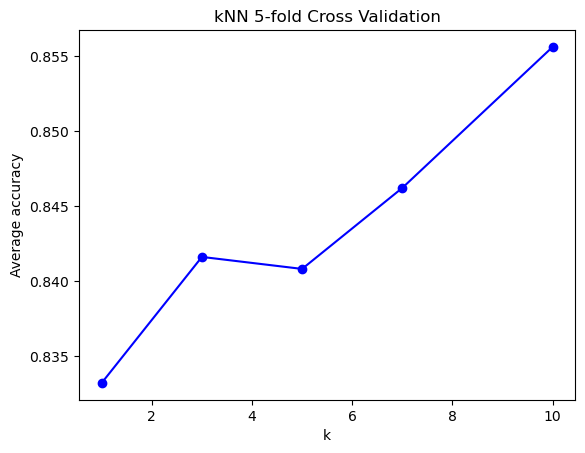

In [13]:
plt.plot(k_list, np.divide(accuracy_list,5),'bo-')
plt.title('kNN 5-fold Cross Validation')
plt.xlabel('k')
plt.ylabel('Average accuracy')
plt.show()

In [19]:
# Q2-5
from sklearn.metrics import roc_curve,roc_auc_score
from LogisticRegressionGrad import LogisticRegression
import warnings

warnings.filterwarnings("ignore")

test_df = df.iloc[:1000]
train_df = df[~df.index.isin(test_df.index.values)]

x_train = train_df.drop(columns='Prediction').to_numpy()
y_train = train_df['Prediction'].to_numpy()
x_test = test_df.drop(columns='Prediction').to_numpy()
y_test = test_df['Prediction'].to_numpy()

clf = LogisticRegression()
clf.fit(x_train,y_train,alpha=0.001,iter=2000)

fpr_r, tpr_r, thresholds_r = roc_curve(y_test, clf.predict_proba(x_test), drop_intermediate=False, pos_label=1)
fpr_k, tpr_k, thresholds_k = roc_curve(y_test,list(knn_predict(x_train,y_train, x_test, 5)), drop_intermediate=False, pos_label=1)
auc_r = roc_auc_score(y_test, clf.predict_proba(x_test))
auc_k = roc_auc_score(y_test,list(knn_predict(x_train,y_train, x_test, 5)))

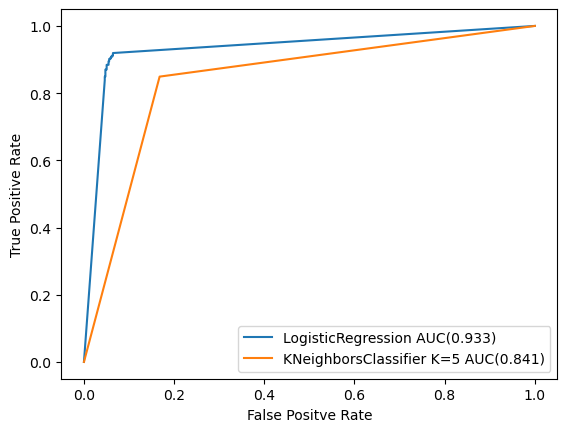

In [21]:

plt.plot(fpr_r,tpr_r,label=f'LogisticRegression AUC({auc_r:.3f})')
plt.plot(fpr_k,tpr_k,label=f'KNeighborsClassifier K=5 AUC({auc_k:.3f})')
plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()